<h3>PASO 1 - Importo las librerias</h3>

In [307]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import MinMaxScaler

<h3>PASO 2 - Cargo el dataframe</h3>

In [308]:
dataframe = pd.read_csv("titanic_processed.csv", encoding="ISO-8859-1")
dataframe

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,0,0,7.8958,0,0,1
1,1,3,0,26.0,0,0,7.9250,0,0,1
2,0,3,1,27.0,0,0,7.8958,0,0,1
3,0,2,1,32.0,2,0,73.5000,0,0,1
4,0,3,1,65.0,0,0,7.7500,0,1,0
...,...,...,...,...,...,...,...,...,...,...
707,0,3,1,22.0,0,0,8.0500,0,0,1
708,1,1,1,35.0,0,0,26.2875,0,0,1
709,0,3,1,21.0,0,0,8.4333,0,0,1
710,0,3,1,25.0,0,0,7.2250,1,0,0


In [309]:
# Creamos una copia para trabajar

dataset = dataframe.copy()
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,0,0,7.8958,0,0,1
1,1,3,0,26.0,0,0,7.9250,0,0,1
2,0,3,1,27.0,0,0,7.8958,0,0,1
3,0,2,1,32.0,2,0,73.5000,0,0,1
4,0,3,1,65.0,0,0,7.7500,0,1,0


In [310]:
# Elimino los posibles errores NaN

dataset = dataset.dropna()
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,0,0,7.8958,0,0,1
1,1,3,0,26.0,0,0,7.9250,0,0,1
2,0,3,1,27.0,0,0,7.8958,0,0,1
3,0,2,1,32.0,2,0,73.5000,0,0,1
4,0,3,1,65.0,0,0,7.7500,0,1,0
...,...,...,...,...,...,...,...,...,...,...
707,0,3,1,22.0,0,0,8.0500,0,0,1
708,1,1,1,35.0,0,0,26.2875,0,0,1
709,0,3,1,21.0,0,0,8.4333,0,0,1
710,0,3,1,25.0,0,0,7.2250,1,0,0


In [311]:
x_data = dataset.copy()
y_data = dataset.pop("Survived")
x_data.pop("Survived")

0      0
1      1
2      0
3      0
4      0
      ..
707    0
708    1
709    0
710    0
711    0
Name: Survived, Length: 712, dtype: int64

In [312]:
# SibSp	Parch	Fare	Embarked_C	Embarked_Q	Embarked_S
# x_data.pop("SibSp")
# x_data.pop("Parch")
# x_data.pop("Fare")
# x_data.pop("Embarked_C")
# x_data.pop("Embarked_Q")
# x_data.pop("Embarked_S")

x_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,0,0,7.8958,0,0,1
1,3,0,26.0,0,0,7.9250,0,0,1
2,3,1,27.0,0,0,7.8958,0,0,1
3,2,1,32.0,2,0,73.5000,0,0,1
4,3,1,65.0,0,0,7.7500,0,1,0
...,...,...,...,...,...,...,...,...,...
707,3,1,22.0,0,0,8.0500,0,0,1
708,1,1,35.0,0,0,26.2875,0,0,1
709,3,1,21.0,0,0,8.4333,0,0,1
710,3,1,25.0,0,0,7.2250,1,0,0


In [313]:
# Decido dividir los datos de entrenamiento y testeo en 80/20 respectivamente

x_entrenar, x_test, y_entrenar, y_test=train_test_split(x_data, y_data, test_size=0.2)

print("Porcentaje de datos de entrenamiento:", len(x_entrenar)*100/(len(x_entrenar)+len(x_test)))
print("Porcentaje de datos de test_________:", len(x_test)*100/(len(x_entrenar)+len(x_test)))

print(x_entrenar.shape)
print(y_entrenar.shape)

Porcentaje de datos de entrenamiento: 79.91573033707866
Porcentaje de datos de test_________: 20.084269662921347
(569, 9)
(569,)


In [314]:
clasificador = linear_model.LogisticRegression(solver='lbfgs', C=100, max_iter=1000)
clasificador.fit(x_entrenar, y_entrenar)

LogisticRegression(C=100, max_iter=1000)

In [315]:
prediccion_entrena = clasificador.predict(x_entrenar)
print(prediccion_entrena)

[0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1
 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 0 0 0 1 0 

In [316]:
print(clasificador.score(x_entrenar, y_entrenar))

0.7996485061511424


In [317]:
prediccion_test = clasificador.predict(x_test)
print("Prediccion Testeo")
print(prediccion_test)
print("Datos reales de Testeo")
print(np.array(y_test))

Prediccion Testeo
[0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0
 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1
 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1]
Datos reales de Testeo
[0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1
 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0
 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1]


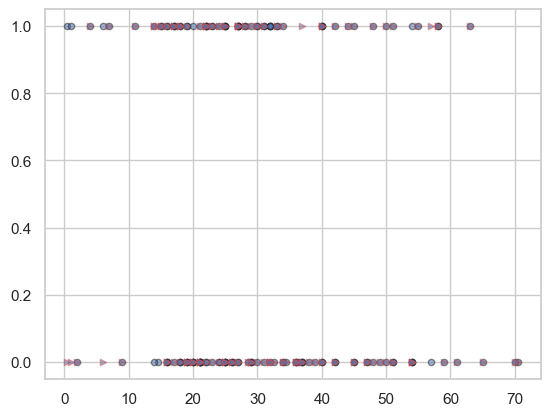

In [342]:
plt.figure()

plt.scatter(x_test["Age"],y_test, alpha=0.5, marker='o', s=20, facecolor='C0', edgecolor='k')
plt.scatter(x_test["Age"],prediccion_test, alpha=0.5, marker='>', s=20, facecolor='C10', edgecolor='r')
plt.show()